In [1]:
# WEEK 1 BFS
graph = {
  'A' : ['B','C'],
  'B' : ['D', 'E'],
  'C' : ['F'],
  'D' : [],
  'E' : ['F'],
  'F' : []
}
visited = [] 
queue = []     

def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
bfs(visited, graph, 'A')


A B C D E F 

In [2]:
#WEEK 1 DFS
graph = {
    'A' : ['B','C'],
    'B' : ['D', 'E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}
visited = set() 
def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)
dfs(visited, graph, 'A')


A
B
D
E
F
C


In [3]:
#prg 2 TSP 
from sys import maxsize
from itertools import permutations

V = 4

def travellingSalesmanProblem(graph, s):
    vertex = [i for i in range(V) if i != s]
    min_path = maxsize
    next_permutation = permutations(vertex)
    for i in next_permutation:
        current_pathweight = 0
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
        min_path = min(min_path, current_pathweight)
    return min_path

if __name__ == "__main__":
    graph = [[0, 10, 15, 20], [10, 0, 35, 25],
             [15, 35, 0, 30], [20, 25, 30, 0]]
    s = 0
    print(travellingSalesmanProblem(graph, s))


80


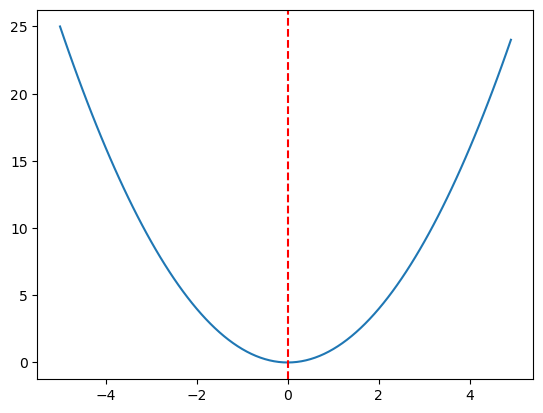

In [4]:
#prg 3 SAA
from numpy import arange
from matplotlib import pyplot

def objective(x):
    return x[0]**2.0

r_min, r_max = -5.0, 5.0
inputs = arange(r_min, r_max, 0.1)
results = [objective([x]) for x in inputs]
pyplot.plot(inputs, results)
x_optima = 0.0
pyplot.axvline(x=x_optima, ls='--', color='red')
pyplot.show()


In [5]:
#prg 4 Tic-Tac-Toe
import random

class TicTacToe:

    def __init__(self):
        self.board = []

    def create_board(self):
        for i in range(3):
            row = []
            for j in range(3):
                row.append('-')
            self.board.append(row)

    def get_random_first_player(self):
        return random.randint(0, 1)

    def fix_spot(self, row, col, player):
        self.board[row][col] = player

    def is_player_win(self, player):
        win = None
        n = len(self.board)
        for i in range(n):
            win = True
            for j in range(n):
                if self.board[i][j] != player:
                    win = False
                    break
            if win:
                return win
        for i in range(n):
            win = True
            for j in range(n):
                if self.board[j][i] != player:
                    win = False
                    break
            if win:
                return win
        win = True
        for i in range(n):
            if self.board[i][i] != player:
                win = False
                break
        if win:
            return win
        win = True
        for i in range(n):
            if self.board[i][n - 1 - i] != player:
                win = False
                break
        if win:
            return win
        return False

    def is_board_filled(self):
        for row in self.board:
            for item in row:
                if item == '-':
                    return False
        return True

    def swap_player_turn(self, player):
        return 'X' if player == 'O' else 'O'

    def show_board(self):
        for row in self.board:
            for item in row:
                print(item, end=" ")
            print()

    def start(self):
        self.create_board()
        player = 'X' if self.get_random_first_player() == 1 else 'O'
        while True:
            print(f"Player {player} turn")
            self.show_board()
            row, col = list(map(int, input("Enter row and column numbers to fix spot: ").split()))
            print()
            self.fix_spot(row - 1, col - 1, player)
            if self.is_player_win(player):
                print(f"Player {player} wins the game!")
                break
            if self.is_board_filled():
                print("Match Draw!")
                break
            player = self.swap_player_turn(player)
        print()
        self.show_board()

tic_tac_toe = TicTacToe()
tic_tac_toe.start()


Player O turn
- - - 
- - - 
- - - 

Player X turn
- - - 
- O - 
- - - 

Player O turn
X - - 
- O - 
- - - 

Player X turn
X - - 
O O - 
- - - 

Player O turn
X - - 
O O - 
- - X 

Player O wins the game!

X - - 
O O O 
- - X 


In [6]:
#prg 5 8 pzle prob
import copy
from heapq import heappush, heappop
n = 3
row = [ 1, 0, -1, 0 ]
col = [ 0, -1, 0, 1 ]
class priorityQueue:
	def __init__(self):
		self.heap = []
	def push(self, k):
		heappush(self.heap, k)
	def pop(self):
		return heappop(self.heap)
	def empty(self):
		if not self.heap:
			return True
		else:
			return False
class node:
	def __init__(self, parent, mat, empty_tile_pos,
				cost, level):
		self.parent = parent
		self.mat = mat
		self.empty_tile_pos = empty_tile_pos
		self.cost = cost
		self.level = level
	def __lt__(self, nxt):
		return self.cost < nxt.cost
def calculateCost(mat, final) -> int:
	count = 0
	for i in range(n):
		for j in range(n):
			if ((mat[i][j]) and
				(mat[i][j] != final[i][j])):
				count += 1
	return count
def newNode(mat, empty_tile_pos, new_empty_tile_pos,
			level, parent, final) -> node:
	new_mat = copy.deepcopy(mat)
	x1 = empty_tile_pos[0]
	y1 = empty_tile_pos[1]
	x2 = new_empty_tile_pos[0]
	y2 = new_empty_tile_pos[1]
	new_mat[x1][y1], new_mat[x2][y2] = new_mat[x2][y2], new_mat[x1][y1]
	cost = calculateCost(new_mat, final)
	new_node = node(parent, new_mat, new_empty_tile_pos,
					cost, level)
	return new_node
def printMatrix(mat):
	for i in range(n):
		for j in range(n):
			print("%d " % (mat[i][j]), end = " ")
		print()
def isSafe(x, y):
	return x >= 0 and x < n and y >= 0 and y < n
def printPath(root):
	if root == None:
		return
	printPath(root.parent)
	printMatrix(root.mat)
	print()
def solve(initial, empty_tile_pos, final):
	pq = priorityQueue()
	cost = calculateCost(initial, final)
	root = node(None, initial,
				empty_tile_pos, cost, 0)
	pq.push(root)
	while not pq.empty():
		minimum = pq.pop()
		if minimum.cost == 0:
			printPath(minimum)
			return
		for i in range(n):
			new_tile_pos = [
				minimum.empty_tile_pos[0] + row[i],
				minimum.empty_tile_pos[1] + col[i], ]
			if isSafe(new_tile_pos[0], new_tile_pos[1]):
				child = newNode(minimum.mat,
								minimum.empty_tile_pos,
								new_tile_pos,
								minimum.level + 1,
								minimum, final,)
				pq.push(child)
initial = [ [ 1, 2, 3 ],
			[ 5, 6, 0 ],
			[ 7, 8, 4 ] ]
final = [ [ 1, 2, 3 ],
		[ 5, 8, 6 ],
		[ 0, 7, 4 ] ]
empty_tile_pos = [ 1, 2 ]
solve(initial, empty_tile_pos, final)


1  2  3  
5  6  0  
7  8  4  

1  2  3  
5  0  6  
7  8  4  

1  2  3  
5  8  6  
7  0  4  

1  2  3  
5  8  6  
0  7  4  



In [7]:
#prg 6 tower of hanoi
class Tower:
  def __init__(self):
    self.terminate = 1
  def printMove(self, source, destination):
    print("{} -> {}".format(source, destination))
  def move(self, disc, source, destination, auxiliary):
    if disc == self.terminate:
      self.printMove(source, destination)
    else:
      self.move(disc - 1, source, auxiliary, destination)
      self.move(1, source, destination, auxiliary)
      self.move(disc - 1, auxiliary, destination, source)
t = Tower();
t.move(3, 'A', 'B', 'C')


A -> B
A -> C
B -> C
A -> B
C -> A
C -> B
A -> B


In [8]:
#prg 7 A* alg
from copy import deepcopy
import numpy as np
import time

def bestsolution(state):
    bestsol = np.array([], int).reshape(-1, 9)
    count = len(state) - 1
    while count != -1:
        bestsol = np.insert(bestsol, 0, state[count]['puzzle'], 0)
        count = (state[count]['parent'])
    return bestsol.reshape(-1, 3, 3)

def all(checkarray):
    set = []
    for it in set:
        for checkarray in it:
            return 1
        else:
            return 0

def misplaced_tiles(puzzle, goal):
    mscost = np.sum(puzzle != goal) - 1
    return mscost if mscost > 0 else 0

def coordinates(puzzle):
    pos = np.array(range(9))
    for p, q in enumerate(puzzle):
        pos[q] = p
    return pos

def evaluvate_misplaced(puzzle, goal):
    steps = np.array([('up', [0, 1, 2], -3), ('down', [6, 7, 8], 3), ('left', [0, 3, 6], -1), ('right', [2, 5, 8], 1)],
                dtype=[('move', str, 1), ('position', list), ('head', int)])
    dtstate = [('puzzle', list), ('parent', int), ('gn', int), ('hn', int)]
    costg = coordinates(goal)
    parent = -1
    gn = 0
    hn = misplaced_tiles(coordinates(puzzle), costg)
    state = np.array([(puzzle, parent, gn, hn)], dtstate)
    dtpriority = [('position', int), ('fn', int)]
    priority = np.array([(0, hn)], dtpriority)
    while 1:
        priority = np.sort(priority, kind='mergesort', order=['fn', 'position'])
        position, fn = priority[0]
        priority = np.delete(priority, 0, 0)
        puzzle, parent, gn, hn = state[position]
        puzzle = np.array(puzzle)
        blank = int(np.where(puzzle == 0)[0])
        gn = gn + 1
        c = 1
        start_time = time.time()
        for s in steps:
            c = c + 1
            if blank not in s['position']:
                openstates = deepcopy(puzzle)
                openstates[blank], openstates[blank + s['head']] = openstates[blank + s['head']], openstates[blank]
                if ~(np.all(list(state['puzzle']) == openstates, 1)).any():
                    end_time = time.time()
                    if ((end_time - start_time) > 2):
                        print(" The 8 puzzle is unsolvable \n")
                        break
                    hn = misplaced_tiles(coordinates(openstates), costg)
                    q = np.array([(openstates, position, gn, hn)], dtstate)
                    state = np.append(state, q, 0)
                    fn = gn + hn
                    q = np.array([(len(state) - 1, fn)], dtpriority)
                    priority = np.append(priority, q, 0)
                    if np.array_equal(openstates, goal):
                        print(' The 8 puzzle is solvable \n')
                        return state, len(priority)
    return state, len(priority)

puzzle = []
puzzle.append(2)
puzzle.append(8)
puzzle.append(3)
puzzle.append(1)
puzzle.append(6)
puzzle.append(4)
puzzle.append(7)
puzzle.append(0)
puzzle.append(5)

goal = []
goal.append(1)
goal.append(2)
goal.append(3)
goal.append(8)
goal.append(0)
goal.append(4)
goal.append(7)
goal.append(6)
goal.append(5)

state, visited = evaluvate_misplaced(puzzle, goal)
bestpath = bestsolution(state)
print(str(bestpath).replace('[', ' ').replace(']', ''))
totalmoves = len(bestpath) - 1
print('\nSteps to reach goal:', totalmoves)
visit = len(state) - visited
print('Total nodes visited: ', visit, "\n")


 The 8 puzzle is solvable 

   2 8 3
   1 6 4
   7 0 5

   2 8 3
   1 0 4
   7 6 5

   2 0 3
   1 8 4
   7 6 5

   0 2 3
   1 8 4
   7 6 5

   1 2 3
   0 8 4
   7 6 5

   1 2 3
   8 0 4
   7 6 5

Steps to reach goal: 5
Total nodes visited:  6 



C:\Users\saiva\AppData\Local\Temp\ipykernel_17692\1336694619.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  blank = int(np.where(puzzle == 0)[0])


In [9]:
#prg 8 water jug pblm
from collections import deque
def Solution(a, b, target):
	m = {}
	isSolvable = False
	path = []
	q = deque()
	#Initializing with jugs being empty
	q.append((0, 0))
	while (len(q) > 0):
		# Current state
		u = q.popleft()
		if ((u[0], u[1]) in m):
			continue
		if ((u[0] > a or u[1] > b or
			u[0] < 0 or u[1] < 0)):
			continue
		path.append([u[0], u[1]])

		m[(u[0], u[1])] = 1

		if (u[0] == target or u[1] == target):
			isSolvable = True
			if (u[0] == target):
				if (u[1] != 0):
					path.append([u[0], 0])
			else:
				if (u[0] != 0):

					path.append([0, u[1]])
			sz = len(path)
			for i in range(sz):
				print("(", path[i][0], ",",
					path[i][1], ")")
			break

		q.append([u[0], b]) # Fill Jug2
		q.append([a, u[1]]) # Fill Jug1
		for ap in range(max(a, b) + 1):
			c = u[0] + ap
			d = u[1] - ap
			if (c == a or (d == 0 and d >= 0)):
				q.append([c, d])
			c = u[0] - ap
			d = u[1] + ap
			if ((c == 0 and c >= 0) or d == b):
				q.append([c, d])
		q.append([a, 0])
		q.append([0, b])
	if (not isSolvable):
		print("Solution not possible")
if __name__ == '__main__':

	Jug1, Jug2, target = 4, 3, 2
	print("Path from initial state "
		"to solution state ::")
	Solution(Jug1, Jug2, target)


Path from initial state to solution state ::
( 0 , 0 )
( 0 , 3 )
( 4 , 0 )
( 4 , 3 )
( 3 , 0 )
( 1 , 3 )
( 3 , 3 )
( 4 , 2 )
( 0 , 2 )


In [10]:
#prg 9 hangman prblm
import time
import random
name = input("What is your name? ")
print("Hello, " + name, "Time to play hangman!")
time.sleep(1)
print("Start guessing...\n")
time.sleep(0.5)
words = ['python', 'programming', 'treasure', 'creative', 'medium', 'horror']
word = random.choice(words)
guesses = ''
turns = 5
while turns > 0:
    failed = 0
    for char in word:
        if char in guesses:
            print(char, end="")
        else:
            print("_", end="")
            failed += 1
    if failed == 0:
        print("\nYou won")
        break
    guess = input("\nguess a character:")
    guesses += guess
    if guess not in word:
        turns -= 1
        print("\nWrong")
        print("\nYou have", +turns, 'more guesses')
        if turns == 0:
            print("\nYou Lose")


Hello, SAI Time to play hangman!
Start guessing...

________
Wrong

You have 4 more guesses
________
Wrong

You have 3 more guesses
________
Wrong

You have 2 more guesses
________
Wrong

You have 1 more guesses
________
Wrong

You have 0 more guesses

You Lose


In [ ]:
#prg 10 N Queen prblm
print("Enter the number of queens")
N = int(input())

board = [[0] * N for _ in range(N)]

def is_attack(i, j):
    for k in range(0, N):
        if board[i][k] == 1 or board[k][j] == 1:
            return True
    for k in range(0, N):
        for l in range(0, N):
            if (k + l == i + j) or (k - l == i - j):
                if board[k][l] == 1:
                    return True
    return False

def N_queen(n):
    if n == 0:
        return True
    for i in range(0, N):
        for j in range(0, N):
            if (not is_attack(i, j)) and (board[i][j] != 1):
                board[i][j] = 1
                if N_queen(n - 1) == True:
                    return True
                board[i][j] = 0
    return False

N_queen(N)
for i in board:
    print(i)

In [ ]:
#prg 11 calendar
import calendar  
  
year = int(input ("Please enter the Year: "))  
month = int(input ("Please enter the month: "))   
  
print ("The Calendar of: ", calendar.month(year, month))  

In [ ]:
#prg 12 chatbot
import random

greetings = ['hello', 'hi', 'hey']
greeting_responses = ['Hello!', 'Hi there!', 'Hey!']
questions = ['how are you?', 'how is your day?', 'what are you doing?']
question_responses = ['I am doing well!', 'My day is going great!', 'I am just chatting with you.']
goodbyes = ['bye', 'goodbye', 'see you later']
goodbye_responses = ['Goodbye!', 'See you later!', 'Take care!']

def chatbot(input_string):
    for word in input_string.split():
        if word.lower() in greetings:
            return random.choice(greeting_responses)
    for word in input_string.split():
        if word.lower() in questions:
            return random.choice(question_responses)
    for word in input_string.split():
        if word.lower() in goodbyes:
            return random.choice(goodbye_responses)
    return "I'm sorry, I don't understand. Can you please rephrase that?"

while True:
    user_input = input("You: ")
    response = chatbot(user_input)
    print("Chatbot:", response)


In [ ]:
import nltk
nltk.download('punkt')  # Ensure the Punkt tokenizer is downloaded
nltk.download('stopwords')  # Ensure stopwords dataset is downloaded

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = """This is a sample sentence, showing off the stop words filtration."""
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

print(word_tokens)  # Original tokens
print(filtered_sentence)  # Filtered tokens